Скачал модуль statsmodels

In [4]:
pip install statsmodels

     |████████████████████████████████| 10.7 MB 664 kB/s eta 0:00:01
     |████████████████████████████████| 38.6 MB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 749 kB/s  eta 0:00:01
     |████████████████████████████████| 232 kB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

1. Загрузите данные из файла price_long.csv, проверьте данные на наличие пропусков, постройте график исходного временного ряда. 

In [4]:
# Загрузил данные из файла
data = pd.read_csv('price_long.csv')
# Проверил на наличие пропусков
print(data.isna().sum())
# Меняю тип данных
data['Time'] = pd.to_datetime(data['Time'])
data.head(10)

Time         0
Price ($)    0
dtype: int64


,Time,Price ($)
0,2017-05-02 00:00:00,21.33
1,2017-05-02 01:00:00,22.05
2,2017-05-02 02:00:00,20.50
3,2017-05-02 03:00:00,20.49
4,2017-05-02 04:00:00,21.11
5,2017-05-02 05:00:00,20.39
6,2017-05-02 06:00:00,20.66
7,2017-05-02 07:00:00,20.77
8,2017-05-02 08:00:00,20.77
9,2017-05-02 09:00:00,20.60


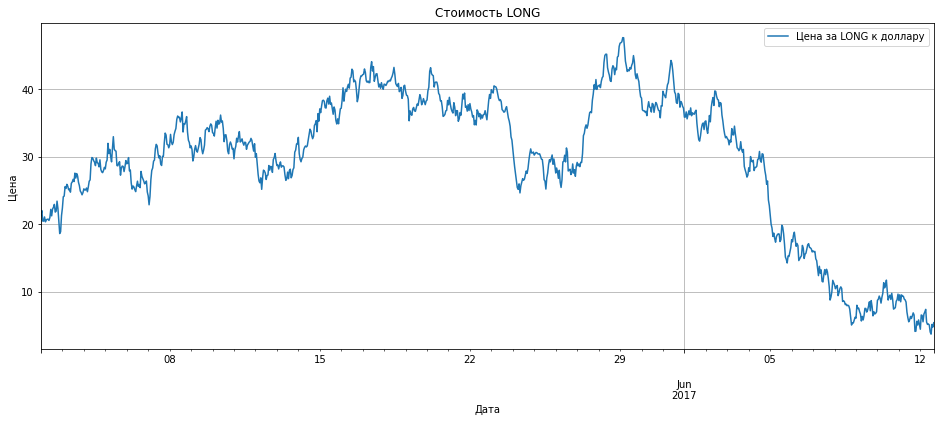

In [5]:
# Нарисовал график
data.plot(x = 'Time', y = 'Price ($)', figsize=(16,6), 
            grid=True, 
            xlabel='Дата',
            ylabel='Цена',
            title='Стоимость LONG')
plt.legend(['Цена за LONG к доллару'])
plt.show()


2. Сгруппируйте данные по дням с агрегирующей функцией среднего значения, постройте график сгруппированных данных. 

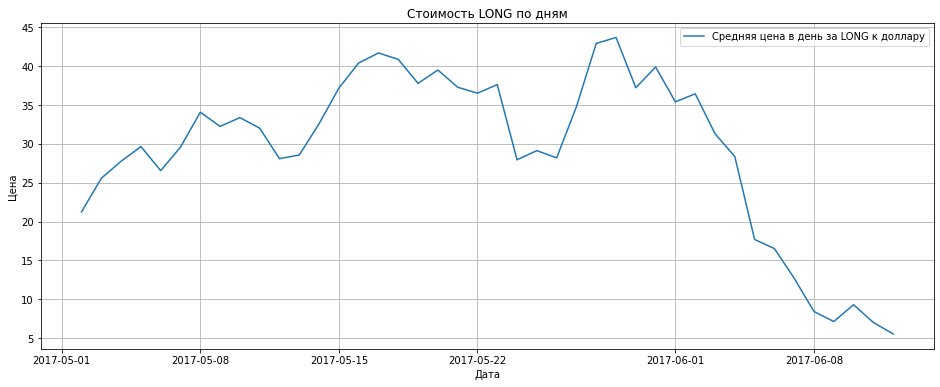

In [6]:
# Сгруппировал данные по дням с агрегирующей функцией среднего значения
data_group = data.groupby(data['Time'].dt.date)['Price ($)'].mean()
# Нарисовал график
data_group.plot(x = 'Time', y = 'Price ($)', figsize=(16,6), 
            grid=True, 
            xlabel='Дата',
            ylabel='Цена',
            title='Стоимость LONG по дням')
plt.legend(['Средняя цена в день за LONG к доллару'])
plt.show()

3. Сформируйте срез данных за период (период задайте сами), постройте график среза.

In [7]:
data.set_index('Time', inplace=True)

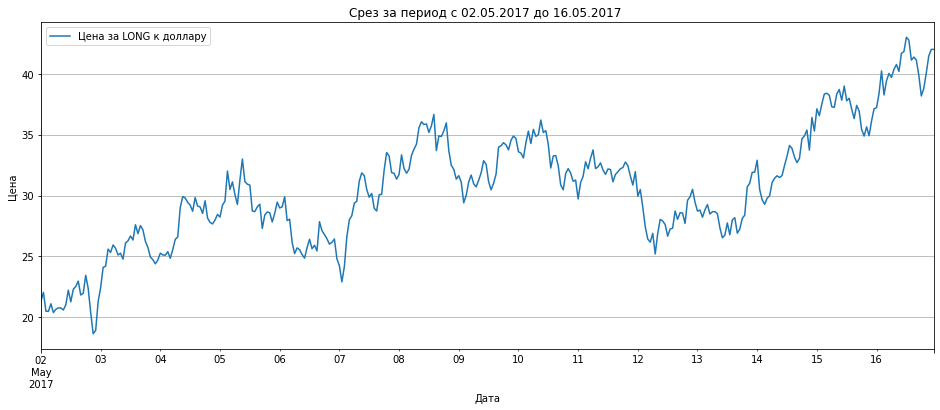

In [8]:
# Посторил срез за 15 дней
data['2017-05-02':'2017-05-16'].plot(figsize=(16,6), 
                                       grid=True, 
                                       xlabel='Дата',
                                       ylabel='Цена',
                                       title='Срез за период с 02.05.2017 до 16.05.2017 ')
plt.legend(['Цена за LONG к доллару'])
plt.show()

4. Определите компоненты ряда, постройте график тренда и сезонной компоненты (если есть).

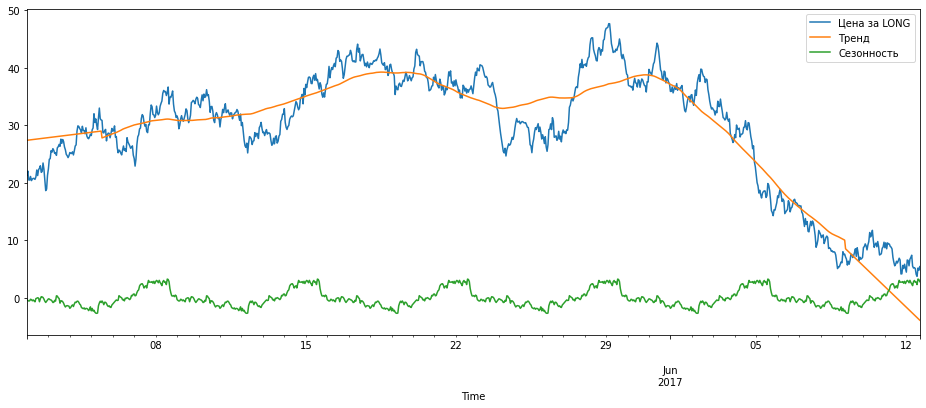

In [37]:
# Разложил ряд на компоненты
decomposition = seasonal_decompose(data, period = 168, extrapolate_trend='freq')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

data.plot(figsize=(16,6))
trend.plot()
seasonal.plot()
plt.legend(['Цена за LONG', 'Тренд', 'Сезонность'])
plt.show()

5. Вычислите скользящее среднее, постройте график среднего.

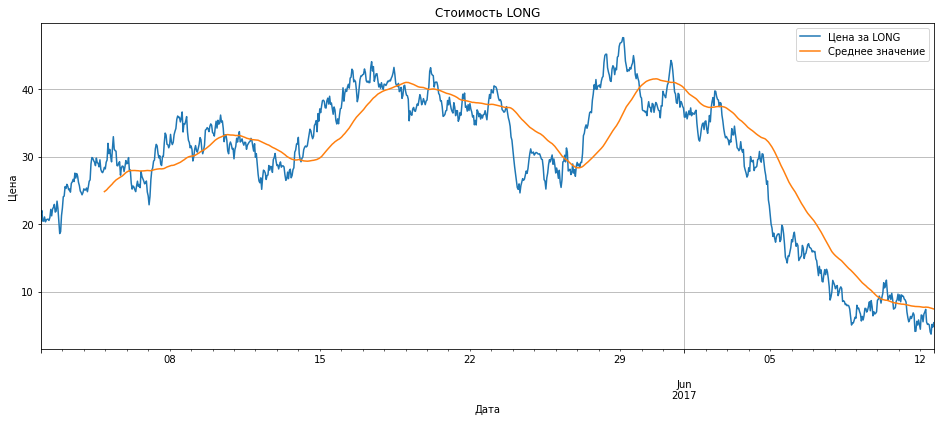

In [41]:
# вычисляем скользящее среднее ряда

data_copy = data.copy()
data_copy['mean'] = data_copy.rolling(72).mean()

data_copy.plot(figsize=(16,6), 
               grid=True,
               xlabel='Дата',
               ylabel='Цена',
               title='Стоимость LONG')

plt.legend(['Цена за LONG', 'Среднее значение'])
plt.show()

6. Проведите визуальные анализ, сформулируйте выводы.

Выводы: имеются данные по стоимости актива LONG с 2017-05-02 по 2017-06-12. Данные содержат два столбца-Time (тип данных object) и Price (float). Шаг в данных 1 час. Для визуализации данных тип данных столбца Time был изменен на datetime. 
Если брать период в 168 часов (1 неделя), что можно считать длительным сроком для такого разбиения, то можно увидеть сначала слабый растущий тренд (пракитчески прямая линия, но под углом), а потом стремительный тренд на падение цены. Сезонности и цикличности не наблюдается. Данный ряд я бы назвал нестационарным 